8.14 Isoperimetric problem

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [37]:
L = 1.4
a = 1
C = 15
N = 200
h = a / N
F = np.array([20, 40, 140, 180])
yfixed = np.zeros(N + 1)
yfixed[F] = [0.1, 0.15, 0.15, 0.2]

In [48]:
y = cp.Variable(N+1)
objective = cp.Maximize(h * cp.sum(y))
constraints = [
    y[0] == 0,
    y[-1] == 0,
    cp.sum(cp.norm(cp.vstack((np.ones(N), (y[1:] - y[:-1]) / h)), 2, axis=0)) <= L / h,
    y[F] == yfixed[F],
    -C * h **2 <= y[2:] + y[:-2] - 2 * y[1:-1],
    C * h **2 >= y[2:] + y[:-2] - 2 * y[1:-1]
]
prob = cp.Problem(objective, constraints)
prob.solve()

0.15396684499552182

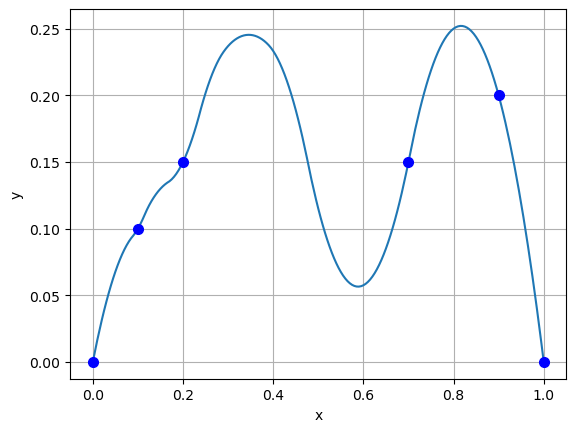

In [49]:
x = np.arange(0, a + h, h)
plt.plot(x,y.value)

plt.plot(0, 0, 'bo', markerfacecolor='b', markersize=7)
plt.plot(a, 0, 'bo', markerfacecolor='b', markersize=7)
plt.plot(x[F], yfixed[F], 'bo', markerfacecolor='b', markersize=7)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()